# Scale-Dependent Modification of Power Spectrum Multipoles

Initiate notebook.

In [1]:
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from nbodykit.lab import cosmology

from config import use_local_package

use_local_package("../../HorizonGRound/")

from horizonground.luminosity import (
    LuminosityFunctionModeller,
    quasar_luminosity_PLE_model,
    quasar_luminosity_hybrid_model,
)
from horizonground.modification import (
    relativistic_corrections,
    non_gaussianity_modification,
    relativistic_modification,
    standard_kaiser_modification,
)

LEGEND_SETTINGS = dict(
    handlelength=1.2, 
    handletextpad=0.5,
    fontsize=16,
)

Define fiducial parameters and parameter ranges.

In [2]:
FIDUCIAL_REDSHIFT = 0.
FIDUCIAL_LINEAR_BIAS = 2.
FIDUCIAL_NON_GAUSSNIANTY = 50.

In [3]:
NUM_POINTS = 200

wavenumbers = np.logspace(-3.5, -1.5, num=NUM_POINTS+1)
redshifts = np.linspace(3., 0., 30)
degrees = [0, 2]

## Evolution and magnification biases

Specify luminosity function model.

In [4]:
modeller = LuminosityFunctionModeller.from_parameters_file(
    quasar_luminosity_PLE_model,
    threshold_magnitude=-21.80,
    file_path="../data/input/PLE_model_fits.txt"
)

evolution_bias = modeller.evolution_bias
magnification_bias = modeller.magnification_bias

Text(0,0.5,'bias')

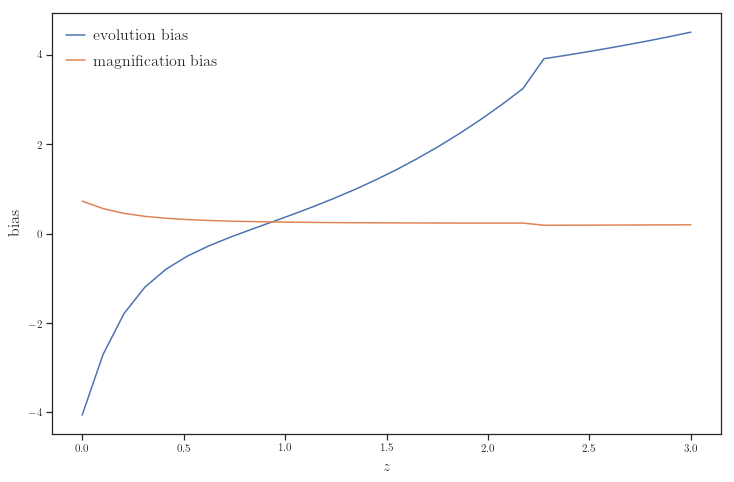

In [5]:


plt.figure("Relativistic biases", figsize=(12, 7.75))
plt.plot(redshifts, evolution_bias(redshifts), label="evolution bias")
plt.plot(redshifts, magnification_bias(redshifts), label="magnification bias")

plt.legend(**LEGEND_SETTINGS)
plt.xlabel(r"$z$", fontsize=16)
plt.ylabel(r"bias", fontsize=16)

## Relavitstic correction terms

/home/wangm/Documents/HorizonGRound/horizonground/modification.py:139: RuntimeWarning: divide by zero encountered in double_scalars
  2 / chi(z) + H_conformal(z) * (1 - 3/2*cosmo.Omega0_m / a(z)**3)
/home/wangm/Documents/HorizonGRound/horizonground/modification.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  5 * magnification_bias(z) * (H_conformal(z) - 1 / chi(z))
/home/wangm/Documents/HorizonGRound/horizonground/modification.py:154: RuntimeWarning: invalid value encountered in double_scalars
  lambda z: geometric_term(z) + evolution_term(z) + lensing_term(z)
/usr/lib64/python2.7/site-packages/numpy/lib/function_base.py:2048: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


Text(0,0.5,'corrections')

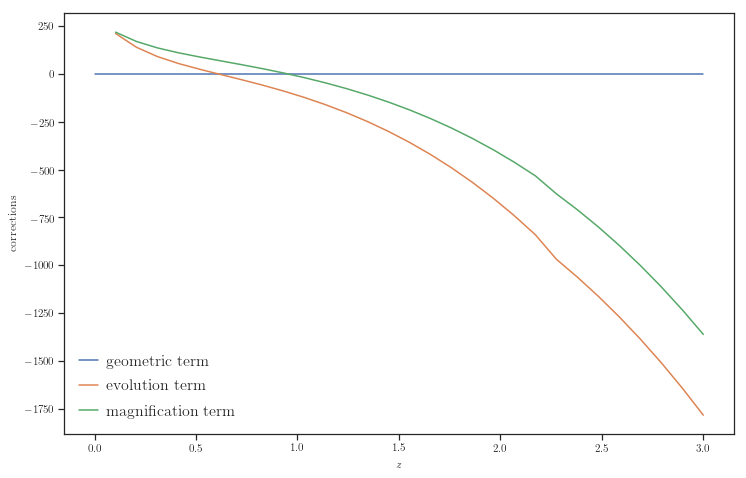

In [6]:
plt.figure("Relativistic corrections", figsize=(12, 7.75))

plt.plot(
    redshifts,
    relativistic_corrections(geometric_bias=True)(redshifts),
    label="geometric term"
)
plt.plot(
    redshifts, 
    relativistic_corrections(geometric_bias=False, evolution_bias=evolution_bias)(redshifts),
    label="evolution term"
)
plt.plot(
    redshifts,
    relativistic_corrections(geometric_bias=False, magnification_bias=magnification_bias)(redshifts),
    label="magnification term"
)

plt.legend(**LEGEND_SETTINGS)
plt.xlabel(r"$z$")
plt.ylabel(r"corrections")

## Modification results

In [7]:
kaiser_result = {
    ell: standard_kaiser_modification(
        FIDUCIAL_REDSHIFT, ell, FIDUCIAL_LINEAR_BIAS
    )
    for ell in degrees
}

In [8]:
relativistic_result = {
    ell: relativistic_modification(
        wavenumbers, FIDUCIAL_REDSHIFT, ell,
        geometric_bias=True,
        evolution_bias=evolution_bias, 
        magnification_bias=magnification_bias
    )
    for ell in degrees
}

/home/wangm/Documents/HorizonGRound/horizonground/modification.py:210: RuntimeWarning: invalid value encountered in multiply
  modification_factor = 1/3 * modification
/home/wangm/Documents/HorizonGRound/horizonground/modification.py:212: RuntimeWarning: invalid value encountered in multiply
  modification_factor = 2/3 * modification


In [9]:
non_gaussianity_result = {
    ell: non_gaussianity_modification(
        wavenumbers, FIDUCIAL_REDSHIFT, ell, 
        FIDUCIAL_NON_GAUSSNIANTY,
        FIDUCIAL_LINEAR_BIAS
    )
    for ell in degrees   
}

Text(0,0.5,'$\\Delta P_\\ell(k) / P_ell^\\mathrm{K}(k)$ [$(h/\\mathrm{Mpc})^3$]')

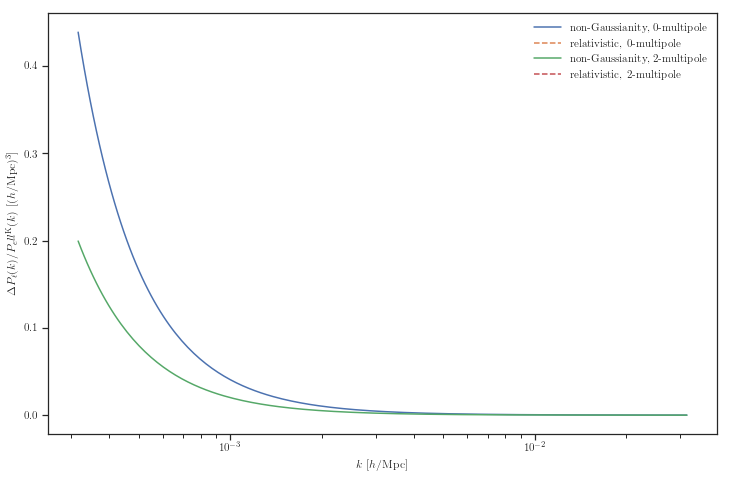

In [10]:
plt.figure("Power spectrum multipole modification", figsize=(12, 7.75))

for ell in degrees:
    plt.semilogx(
        wavenumbers, non_gaussianity_result[ell]/kaiser_result[ell],
        ls='-',
        label="non-Gaussianity, {}-multipole".format(ell)
    )
    plt.semilogx(
        wavenumbers, relativistic_result[ell]/kaiser_result[ell],
        ls='--', 
        label="relativistic, {}-multipole".format(ell)
    )

plt.legend()
plt.xlabel(r"$k$ [$h$/Mpc]")
plt.ylabel(r"$\Delta P_\ell(k) / P_ell^\mathrm{K}(k)$ [$(h/\mathrm{Mpc})^3$]")